In [3]:
%matplotlib inline
import matplotlib as mpl
print __doc__
import numpy as np
import pyart
import matplotlib.pyplot as plt
import netCDF4
import copy
import scipy.ndimage as nd
import numpy.ma as ma
from IPython.display import Latex
import sys
import corregir_azimuth
from corregir_azimuth import*

Automatically created module for IPython interactive environment


In [4]:
radar= pyart.io.read('/home/sofia/proyecto/Datos_test/NetCDF/cfrad.20100209_210344.000_to_20100209_210722.000_INTA_Ang_v127_SUR.nc')

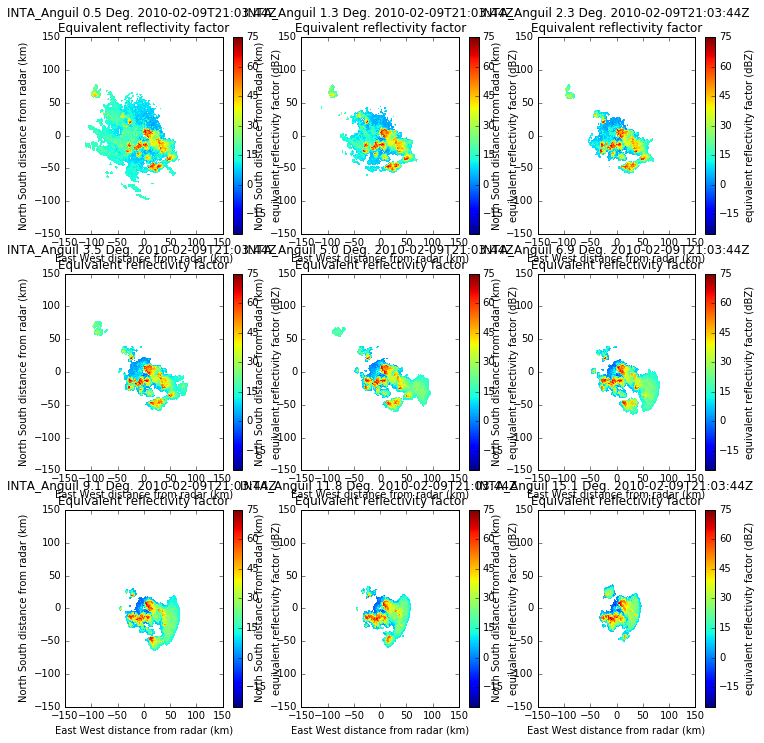

In [8]:
display = pyart.graph.RadarMapDisplay(radar)

f = plt.figure(figsize = [12,12])

plt.subplot(3, 3, 1) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,cmap='jet')
plt.subplot(3, 3, 2) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=1,cmap='jet')
plt.subplot(3, 3, 3) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=2,cmap='jet')
plt.subplot(3, 3, 4) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=3,cmap='jet')
plt.subplot(3, 3, 5) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=4,cmap='jet')
plt.subplot(3, 3, 6) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=5,cmap='jet')
plt.subplot(3, 3, 7) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=6,cmap='jet')
plt.subplot(3, 3, 8) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=7,cmap='jet')
plt.subplot(3, 3, 9) 
display.plot_ppi('dBZ',vmin=-25,vmax=75,sweep=8,cmap='jet')






In [22]:
AzC=corregir_azimuth(radar)
radar_lat = radar.latitude['data'][0]
radar_lon = radar.longitude['data'][0]
radar_alt = radar.altitude['data'][0]
sazimuth = 100 ###Azimuth desired
d2r=np.pi/180 

#constant necessary 
Re=6370000;  #radius of the earth
ke=(4/3);
data=[]                 #dBZ data
S=[]                    #distance on the earth's surface
H=[]                    #height

In [23]:
for i in range (radar.nsweeps):
    sweep=i
    ang=radar.get_elevation(sweep)[0]
    data.append(np.ones([3,480]))
    azi=AzC[i][sazimuth]
    data[i][1,:] = radar.fields['dBZ']['data'].data[azi,:]
    rango=radar.range['data']
    
    H.append(np.ones([3,480])) 
    H[i][0,:]=radar_alt+np.sqrt((ke*Re)**2+2*rango*np.sin((ang-0.5)*d2r)*ke*Re+rango**2)-ke*Re
    H[i][1,:]=radar_alt+np.sqrt((ke*Re)**2+2*rango*np.sin(ang*d2r)*ke*Re+rango**2)-ke*Re
    H[i][2,:]=radar_alt+np.sqrt((ke*Re)**2+2*rango*np.sin((ang+0.5)*d2r)*ke*Re+rango**2)-ke*Re
    
    S.append(np.ones([3,480]))
    S[i][0,:]= ke*Re*np.arcsin((rango*np.cos((ang-0.5)*d2r))/(ke*Re))
    S[i][1,:]= ke*Re*np.arcsin((rango*np.cos(ang*d2r))/(ke*Re))
    S[i][2,:]=ke*Re*np.arcsin((rango*np.cos((ang+0.5)*d2r))/(ke*Re))
             


# Graphic

/home/sofia/anaconda2/lib/python2.7/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The shading option was deprecated in version 1.2. Use edgecolors instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


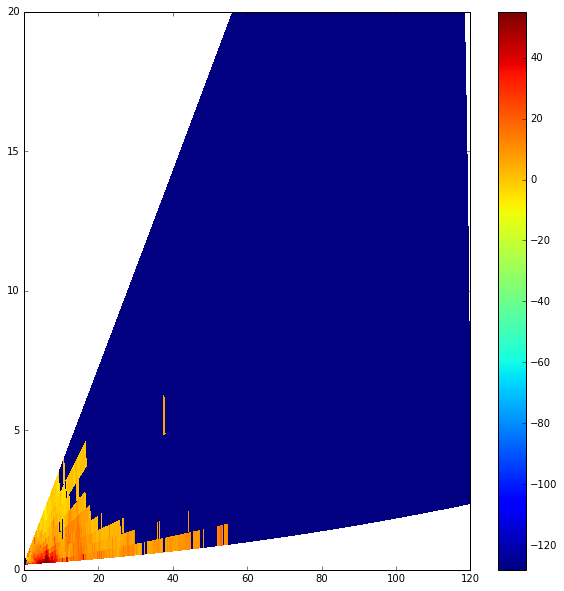

In [12]:

valor=np.array(data)[:,1,:]
altura=np.array(H)[:,1,:]/1000
s=np.array(S)[:,1,:]/1000

plt.figure(figsize=(10,10))
plt.pcolor(s,altura,valor,shading='flat')
plt.axis([0, 120, 0, 20])
plt.colorbar()
plt.show()
plt.close()

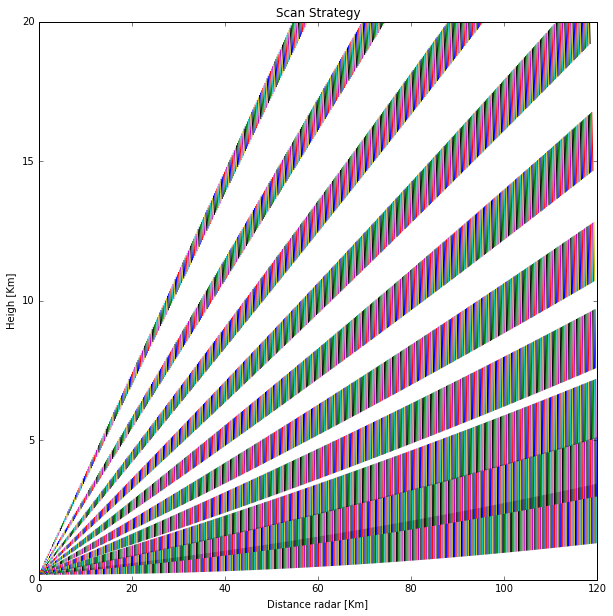

In [13]:
plt.figure(figsize=(10,10))
for ii in range(radar.nsweeps):
    
    plt.plot(S[ii]/1e3,H[ii]/1e3)
    plt.axis([0, 120, 0, 20])
plt.xlabel('Distance radar [Km]')
plt.ylabel('Heigh [Km]')
plt.title('Scan Strategy')


plt.show()
plt.close()

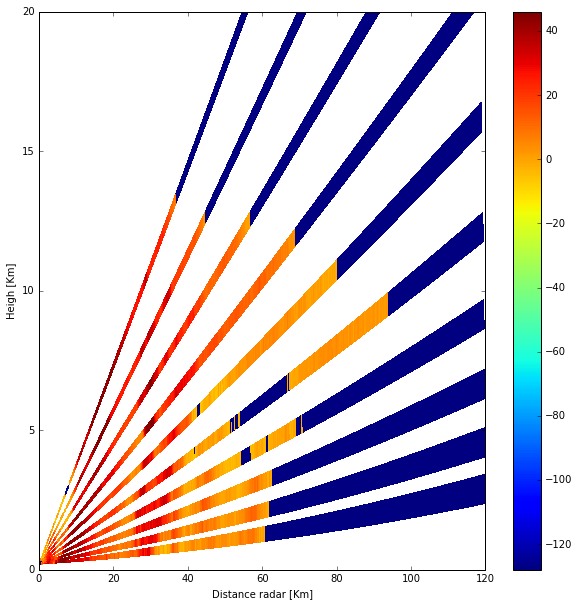

In [24]:
mx = ma.masked_equal (data, 1)


plt.figure(figsize=(10,10))
for ii in range(radar.nsweeps):
    
    plt.pcolor(np.array(S[ii])/1e3,np.array(H[ii])/1e3,mx[ii],shading='flat')
    plt.axis([0, 120, 0, 20])
plt.xlabel('Distance radar [Km]')
plt.ylabel('Heigh [Km]')
plt.colorbar()
plt.show()
plt.close()